In [25]:
import pandas as pd

# Load the datasets
gdp_data = pd.read_csv('C:/Users/Hari/Desktop/Uni Stuff/Module 5/e-Portfolio Submission/Unit04 Global_GDP.csv')
population_data = pd.read_csv('C:/Users/Hari/Desktop/Uni Stuff/Module 5/e-Portfolio Submission/Unit04 Global_Population.csv')

print(gdp_data.head())
print(population_data.head())


                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  1.929944e+10  1.970954e+10  2.147872e+10  2.571501e+10   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.040428e+10  1.112805e+10  1.194335e+10  1.267652e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2011          2012          2013  \
0           NaN           NaN  ...  2.549721e+09  2.534637e+

In [32]:
# Select the relevant columns for the years 2001-2020
years = [str(year) for year in range(2001, 2021)]
gdp_columns = ['Country Name'] + years
population_columns = ['Country Name'] + years

gdp_data = gdp_data[gdp_columns]
population_data = population_data[population_columns]

# Ensure columns are numeric
gdp_data[years] = gdp_data[years].apply(pd.to_numeric, errors='coerce')
population_data[years] = population_data[years].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean for each column
gdp_data[years] = gdp_data[years].fillna(gdp_data[years].mean())
population_data[years] = population_data[years].fillna(population_data[years].mean())

# Drop any rows with remaining missing values
gdp_data.dropna(inplace=True)
population_data.dropna(inplace=True)

# Verify the data after filling missing values
print(gdp_data.head())
print(population_data.head())


                  Country Name          2001          2002          2003  \
0                        Aruba  1.920112e+09  1.941341e+09  2.021229e+09   
1  Africa Eastern and Southern  2.586600e+11  2.647080e+11  3.524430e+11   
2                  Afghanistan  1.027841e+12  4.055180e+09  4.515559e+09   
3   Africa Western and Central  1.480120e+11  1.769330e+11  2.046420e+11   
4                       Angola  8.936064e+09  1.528559e+10  1.781271e+10   

           2004          2005          2006          2007          2008  \
0  2.228492e+09  2.330726e+09  2.424581e+09  2.615084e+09  2.745251e+09   
1  4.385650e+11  5.118980e+11  5.755690e+11  6.607740e+11  7.078530e+11   
2  5.226779e+09  6.209138e+09  6.971286e+09  9.747880e+09  1.010931e+10   
3  2.540900e+11  3.105540e+11  3.932970e+11  4.617780e+11  5.664260e+11   
4  2.355205e+10  3.697092e+10  5.238101e+10  6.526645e+10  8.853861e+10   

           2009  ...          2011          2012          2013          2014  \
0  2.498883e

In [34]:
# Calculate mean population and mean GDP per capita for each country from 2001 to 2020
mean_population = population_data.set_index('Country Name')[years].mean(axis=1)
mean_gdp_per_capita = gdp_data.set_index('Country Name')[years].mean(axis=1)

# Ensure both Series have the same countries by taking the intersection
common_countries = mean_population.index.intersection(mean_gdp_per_capita.index)
mean_population = mean_population.loc[common_countries]
mean_gdp_per_capita = mean_gdp_per_capita.loc[common_countries]

# Check if the lengths are the same
print(len(mean_population), len(mean_gdp_per_capita))

mean_population, mean_gdp_per_capita = mean_population.align(mean_gdp_per_capita, join='inner')

print(len(mean_population), len(mean_gdp_per_capita))



267 266
267 267


In [35]:
mean_data = pd.DataFrame({
    'Country Name': mean_population.index,
    'Mean_Population': mean_population.values,
    'Mean_GDP_Per_Capita': mean_gdp_per_capita.values
})

# Displaing the first few rows of the mean_data DataFrame
print(mean_data.head())


                  Country Name  Mean_Population  Mean_GDP_Per_Capita
0                  Afghanistan     3.021299e+07         6.471392e+10
1  Africa Eastern and Southern     5.321282e+08         7.441522e+11
2   Africa Western and Central     3.594714e+08         5.570494e+11
3                      Albania     2.935900e+06         1.092357e+10
4                      Algeria     3.685864e+07         1.454878e+11


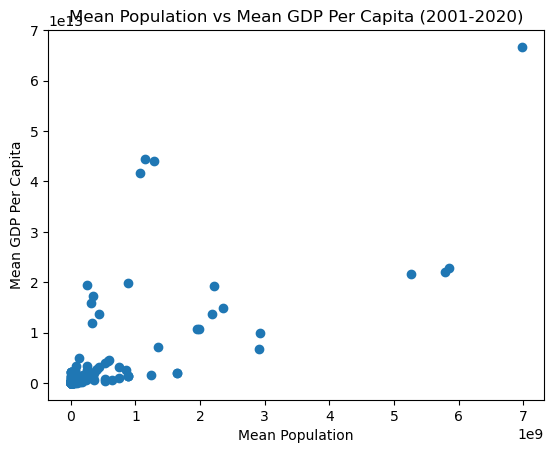

Pearson Correlation Coefficient: 0.711


In [36]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Plotting the data
plt.scatter(mean_data['Mean_Population'], mean_data['Mean_GDP_Per_Capita'])
plt.xlabel('Mean Population')
plt.ylabel('Mean GDP Per Capita')
plt.title('Mean Population vs Mean GDP Per Capita (2001-2020)')
plt.show()

# Calculating the Pearson correlation coefficient
corr, _ = pearsonr(mean_data['Mean_Population'], mean_data['Mean_GDP_Per_Capita'])
print('Pearson Correlation Coefficient: %.3f' % corr)


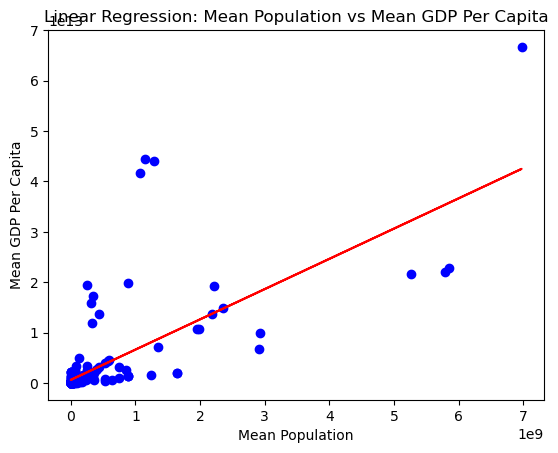

Slope: 6009.501
Intercept: 598736160203.372


In [37]:
from sklearn.linear_model import LinearRegression

# Preparing the data for regression
X = mean_data['Mean_Population'].values.reshape(-1, 1)
y = mean_data['Mean_GDP_Per_Capita'].values

# Creating and fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting the mean GDP per capita
y_pred = model.predict(X)

# Plotting the regression line
plt.scatter(mean_data['Mean_Population'], mean_data['Mean_GDP_Per_Capita'], color='blue')
plt.plot(mean_data['Mean_Population'], y_pred, color='red')
plt.xlabel('Mean Population')
plt.ylabel('Mean GDP Per Capita')
plt.title('Linear Regression: Mean Population vs Mean GDP Per Capita')
plt.show()

# Printing the regression coefficients
print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)
